In [1]:
#import necessary libraries
import ipywidgets as widgets
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from xml.dom import minidom

import numpy as np
from scipy import interpolate
import pylab as pl

from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
import numpy as np

np.set_printoptions(threshold=np.inf)

#initializations
init_notebook_mode(connected=True)

In [9]:
#import data
filename = '20180806_Test_2_2'
# filename = '20180622_Test_2'
findLabel = 'Packet'
SensorData = None
time = 0

#import xml-file
xDoc = minidom.parse(filename + ".xml")
allListitems = xDoc.getElementsByTagName(findLabel) 

for s in allListitems:
    if SensorData is None:
        SensorData = s.attributes['Samples'].value.split(',')
    else:
        SensorData = np.append(SensorData, s.attributes['Samples'].value.split(','))

#import csv-file
ForceData = pd.read_csv(filename + ".csv",delimiter=',')
# column_cssj = column_cssj.set_index("State", drop = False)

In [10]:
len(SensorData)

4382

In [11]:
len(ForceData["cssj"][1:])

4698

In [12]:
#create sliders
timemult = widgets.FloatSlider(
    value=0.393,
    min=0.390,
    max=0.400,
    step=0.001,
    continuous_update = False)

valuemult = widgets.FloatSlider(
    value=55,
    min=1,
    max=200,
    step=1,
    continuous_update = False)

valueoffset = widgets.FloatSlider(
    value=1900,
    min=1000,
    max=3000,
    step=5,
    continuous_update = False)

timeoffset = widgets.FloatSlider(
    value=0,
    min=-10,
    max=10,
    step=0.1,
    continuous_update = False)

#create figure
figure = {
    'data': [],
    'layout': {},
    #'frames': [],
}

In [13]:
def update_plot(timemult,valuemult,valueoffset,timeoffset):
    #assign data
    trace1 = go.Scattergl(
        x = np.linspace(0, (len(SensorData)-1)/10, num=len(SensorData)),
        y = SensorData,
        name =" Sensor Data",
        mode = 'line',
        marker = dict(
        color = 'blue',
#         line = dict(width = 1)
    )
        )

    trace2 = go.Scattergl(
        x =  ForceData['cstm']*timemult+timeoffset,
        y =  ForceData['cssj']*valuemult+valueoffset,
        name = "Force Data",
         mode = 'line',
        marker = dict(
        color = 'red',
#         line = dict(width = 1)
    )
        )
    
    figure['data'] =[trace1,trace2]
    
    #set layout
    figure['layout'] = {
        'title': 'Data',
            'xaxis': {'title': 'Time [s]'},
            'yaxis': {'title': 'Sensor Data (mV)'}}
    
    #draw plot
    iplot(figure, filename='axes-booleans')

In [14]:
ForceData["cstm"][1:len(SensorData)].values

array([0.0000e+00, 2.0000e-01, 4.0000e-01, 6.0000e-01, 8.0000e-01,
       1.0000e+00, 1.2000e+00, 1.4000e+00, 1.6000e+00, 1.8000e+00,
       2.0000e+00, 2.2000e+00, 2.4000e+00, 2.6000e+00, 2.8000e+00,
       3.0000e+00, 3.2000e+00, 3.4000e+00, 3.6000e+00, 3.8000e+00,
       4.0000e+00, 4.2000e+00, 4.4000e+00, 4.6000e+00, 4.8000e+00,
       5.0000e+00, 5.2000e+00, 5.4000e+00, 5.6000e+00, 5.8000e+00,
       6.0000e+00, 6.2000e+00, 6.4000e+00, 6.6000e+00, 6.8000e+00,
       7.0000e+00, 7.2000e+00, 7.4000e+00, 7.6000e+00, 7.8000e+00,
       8.0000e+00, 8.2000e+00, 8.4000e+00, 8.6000e+00, 8.8000e+00,
       9.0000e+00, 9.2000e+00, 9.4000e+00, 9.6000e+00, 9.8000e+00,
       1.0000e+01, 1.0200e+01, 1.0400e+01, 1.0600e+01, 1.0800e+01,
       1.1000e+01, 1.1200e+01, 1.1400e+01, 1.1600e+01, 1.1800e+01,
       1.2000e+01, 1.2200e+01, 1.2400e+01, 1.2600e+01, 1.2800e+01,
       1.3000e+01, 1.3200e+01, 1.3400e+01, 1.3600e+01, 1.3800e+01,
       1.4000e+01, 1.4200e+01, 1.4400e+01, 1.4600e+01, 1.4800e

In [15]:
ForceData["cstm"][1:len(SensorData)].values.astype(float)*1.272

array([0.00000000e+00, 2.54400000e-01, 5.08800000e-01, 7.63200000e-01,
       1.01760000e+00, 1.27200000e+00, 1.52640000e+00, 1.78080000e+00,
       2.03520000e+00, 2.28960000e+00, 2.54400000e+00, 2.79840000e+00,
       3.05280000e+00, 3.30720000e+00, 3.56160000e+00, 3.81600000e+00,
       4.07040000e+00, 4.32480000e+00, 4.57920000e+00, 4.83360000e+00,
       5.08800000e+00, 5.34240000e+00, 5.59680000e+00, 5.85120000e+00,
       6.10560000e+00, 6.36000000e+00, 6.61440000e+00, 6.86880000e+00,
       7.12320000e+00, 7.37760000e+00, 7.63200000e+00, 7.88640000e+00,
       8.14080000e+00, 8.39520000e+00, 8.64960000e+00, 8.90400000e+00,
       9.15840000e+00, 9.41280000e+00, 9.66720000e+00, 9.92160000e+00,
       1.01760000e+01, 1.04304000e+01, 1.06848000e+01, 1.09392000e+01,
       1.11936000e+01, 1.14480000e+01, 1.17024000e+01, 1.19568000e+01,
       1.22112000e+01, 1.24656000e+01, 1.27200000e+01, 1.29744000e+01,
       1.32288000e+01, 1.34832000e+01, 1.37376000e+01, 1.39920000e+01,
      

In [23]:
len(ForceData["cstm"]//1.272)

4699

In [26]:
len(ForceData["cstm"][1:len(ForceData["cstm"]//1.272)].values.astype(float)*1.272)

4698

In [58]:
len(ForceData["cssj"][1:].values)

4698

In [64]:
widgets.interactive(update_plot,timemult=timemult,valuemult=valuemult,valueoffset=valueoffset,timeoffset=timeoffset)

interactive(children=(FloatSlider(value=0.3945, continuous_update=False, description='timemult', max=0.4, min=…

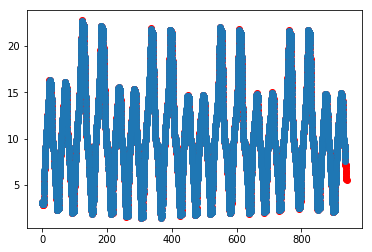

In [60]:
#!/usr/bin/env python
# -*-coding:utf-8 -*-
import numpy as np
from scipy import interpolate
import pylab as pl
 
x = ForceData["cstm"][1:].values
y = ForceData["cssj"][1:].values

# xnew = ForceData["cstm"][1:len(SensorData)].values.astype(float)*1.272
# xnew = ForceData["cstm"][1:len(ForceData["cstm"]//1.272)].values.astype(float)*1.272
xnew = ForceData["cstm"][1:3680].values.astype(float)*1.272
pl.plot(x,y,"ro")
 
f=interpolate.interp1d(x,y)
ynew=f(xnew)
pl.plot(xnew,ynew,'o')
pl.show()

In [65]:
    #assign data
trace0 = go.Scattergl(
        x = ynew,
        y = SensorData[5:],
        name ="xy",
        mode = 'lines',
        line=dict(
            width=1, color='blue'
        )
)
data = [trace0]

iplot(data, filename='scatter')

In [62]:
len(ynew)

3679

In [63]:
trace0 = go.Scattergl(
        x = ynew,
        y = SensorData,
        name ="xy",
        mode = 'lines',
        line=dict(
            width=1, color='blue'
        )
)
data2 = [trace0,trace0]

layout2=dict(
            title='Anime Test', hovermode='closest',
            updatemenus= [{'type': 'buttons',
                           'buttons': [{'label': 'Play',
                                        'method': 'animate',
                                        'args': [None]}]}])

# M = len(SensorData)//10
M = 3680//10
x2 = ynew[:3680:10]
y2 = SensorData[:3680:10]
frames2=[dict(data=[dict(x=[x2[k]], 
                        y=[y2[k]], 
                        mode='markers', 
                        marker=dict(color='red', size=10)
                        )
                  ]) for k in range(M)]  

# steps = []
# for i in range(len(data)):
#     step = dict(
#         method = 'restyle',  
#         args = ['visible', [False] * len(data)],
#     )
#     step['args'][1][i] = True # Toggle i'th trace to "visible"
#     steps.append(step)

# sliders = [dict(
#     active = 10,
#     currentvalue = {"prefix": "Frequency: "},
#     pad = {"t": 50},
#     steps = steps
# )]
# layout = dict(sliders=sliders)
# fig = dict(data=data, layout=layout)
# py.iplot(fig, filename='Sine Wave Slider')

figure2 = dict(data=data2, layout=layout2, frames=frames2)
iplot(figure2, filename='Animation')